In [1]:
import pandas as pd
import logging
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_df = pd.read_csv('./local_data/TB_Burden_Country.csv')

In [3]:
dataset_df.shape

(5120, 47)

In [4]:
dataset_df

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,306.0,156.0,506.0,...,0.11,0.08,0.14,12.0,9.4,16.0,NaN,20.0,15.0,24.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,343.0,178.0,562.0,...,0.13,0.11,0.16,17.0,14.0,20.0,NaN,96.0,80.0,110.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,371.0,189.0,614.0,...,0.16,0.14,0.18,22.0,19.0,24.0,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,392.0,194.0,657.0,...,0.19,0.17,0.21,28.0,25.0,31.0,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,410.0,198.0,697.0,...,0.21,0.18,0.24,35.0,30.0,39.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZW,ZWE,716,AFR,2009,12888918,449.0,258.0,692.0,...,511.00,460.00,566.00,66000.0,59000.0,73000.0,NaN,50.0,45.0,54.0
5116,Zimbabwe,ZW,ZWE,716,AFR,2010,13076978,415.0,239.0,639.0,...,487.00,433.00,545.00,64000.0,57000.0,71000.0,NaN,53.0,48.0,59.0
5117,Zimbabwe,ZW,ZWE,716,AFR,2011,13358738,417.0,241.0,639.0,...,448.00,403.00,502.00,60000.0,54000.0,67000.0,NaN,48.0,43.0,53.0
5118,Zimbabwe,ZW,ZWE,716,AFR,2012,13724317,425.0,245.0,654.0,...,411.00,362.00,471.00,56000.0,50000.0,65000.0,NaN,45.0,40.0,52.0


In [5]:
dataset_df.columns

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       '

In [6]:
dataset_df.dtypes

Country or territory name                                                                          object
ISO 2-character country/territory code                                                             object
ISO 3-character country/territory code                                                             object
ISO numeric country/territory code                                                                  int64
Region                                                                                             object
Year                                                                                                int64
Estimated total population number                                                                   int64
Estimated prevalence of TB (all forms) per 100 000 population                                     float64
Estimated prevalence of TB (all forms) per 100 000 population, low bound                          float64
Estimated prevalence of TB (all forms) per 100

In [7]:
int_cols = dataset_df.select_dtypes(include='int64').columns

In [8]:
int_cols

Index(['ISO numeric country/territory code', 'Year',
       'Estimated total population number'],
      dtype='object')

In [9]:
duplicates = dataset_df.duplicated()
print(duplicates)
dataset_df[dataset_df.duplicated(keep=False)]

0       False
1       False
2       False
3       False
4       False
        ...  
5115    False
5116    False
5117    False
5118    False
5119    False
Length: 5120, dtype: bool


,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"


In [10]:
null_value = dataset_df.isnull().sum()
print(null_value)

Country or territory name                                                                            0
ISO 2-character country/territory code                                                              24
ISO 3-character country/territory code                                                               0
ISO numeric country/territory code                                                                   0
Region                                                                                               0
Year                                                                                                 0
Estimated total population number                                                                    0
Estimated prevalence of TB (all forms) per 100 000 population                                        0
Estimated prevalence of TB (all forms) per 100 000 population, low bound                            20
Estimated prevalence of TB (all forms) per 100 000 population, high bound

In [11]:
row_with_missing_values = dataset_df[dataset_df.isna().any(axis=1)]
print(row_with_missing_values)
null_vals = dataset_df.isnull().sum()

     Country or territory name ISO 2-character country/territory code  \
0                  Afghanistan                                     AF   
1                  Afghanistan                                     AF   
2                  Afghanistan                                     AF   
3                  Afghanistan                                     AF   
4                  Afghanistan                                     AF   
...                        ...                                    ...   
5115                  Zimbabwe                                     ZW   
5116                  Zimbabwe                                     ZW   
5117                  Zimbabwe                                     ZW   
5118                  Zimbabwe                                     ZW   
5119                  Zimbabwe                                     ZW   

     ISO 3-character country/territory code  \
0                                       AFG   
1                            

In [12]:
dataset_df.drop('Method to derive TBHIV estimates', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence of TB cases who are HIV-positive, high bound', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence of TB cases who are HIV-positive, low bound', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence of TB cases who are HIV-positive', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound', axis = 1, inplace = True)
dataset_df.drop('Estimated incidence of TB cases who are HIV-positive per 100 000 population', axis = 1, inplace = True)
dataset_df.drop('Estimated HIV in incident TB (percent), high bound', axis = 1, inplace = True)
dataset_df.drop('Estimated HIV in incident TB (percent), low bound', axis = 1, inplace = True)
dataset_df.drop('Estimated HIV in incident TB (percent)', axis = 1, inplace = True)
dataset_df.drop('Method to derive incidence estimates', axis = 1, inplace = True)
dataset_df.drop('Estimated number of deaths from TB in people who are HIV-positive, high bound', axis = 1, inplace = True)
dataset_df.drop('Estimated number of deaths from TB in people who are HIV-positive, low bound', axis = 1, inplace = True)
dataset_df.drop('Estimated mortality of TB cases who are HIV-positive, per 100 000 population, high bound', axis = 1, inplace = True)
dataset_df.drop('Estimated mortality of TB cases who are HIV-positive, per 100 000 population, low bound', axis = 1, inplace = True)

In [13]:
dataset_df.dtypes

Country or territory name                                                                          object
ISO 2-character country/territory code                                                             object
ISO 3-character country/territory code                                                             object
ISO numeric country/territory code                                                                  int64
Region                                                                                             object
Year                                                                                                int64
Estimated total population number                                                                   int64
Estimated prevalence of TB (all forms) per 100 000 population                                     float64
Estimated prevalence of TB (all forms) per 100 000 population, low bound                          float64
Estimated prevalence of TB (all forms) per 100

In [14]:
null_value = dataset_df.isnull().sum()
print(null_value)

Country or territory name                                                                           0
ISO 2-character country/territory code                                                             24
ISO 3-character country/territory code                                                              0
ISO numeric country/territory code                                                                  0
Region                                                                                              0
Year                                                                                                0
Estimated total population number                                                                   0
Estimated prevalence of TB (all forms) per 100 000 population                                       0
Estimated prevalence of TB (all forms) per 100 000 population, low bound                           20
Estimated prevalence of TB (all forms) per 100 000 population, high bound         

In [15]:
print(all(np.where(dataset_df['Year']>0, True, False)))
print(all(np.where(dataset_df['ISO numeric country/territory code']>0, True, False)))
print(all(np.where(dataset_df['Estimated total population number']>0, True, False)))

True
True
True


In [16]:
df_floats = dataset_df.select_dtypes(include='float64').columns
print(df_floats)

Index(['Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       'Estimated number of deaths from TB (all forms, excluding HIV)',
       'Estimated number of deaths from TB (all forms, excluding HIV), low bound',
       'Estimated number of deaths from TB (all forms, excluding HIV), high bound',
       'Estimated mortality of TB cases who are HIV

In [17]:
def check_all_floats(df: object, column_name: str):
    ''' Checks if all values in a column are floats '''
    value = df[column_name].apply(lambda x: isinstance(x, float)).all()
    return value
print(check_all_floats(dataset_df, 'Estimated prevalence of TB (all forms) per 100 000 population'))
print(check_all_floats(dataset_df, 'Estimated prevalence of TB (all forms) per 100 000 population, low bound'))
print(check_all_floats(dataset_df, 'Estimated prevalence of TB (all forms) per 100 000 population, high bound'))
print(check_all_floats(dataset_df, 'Estimated prevalence of TB (all forms)'))
print(check_all_floats(dataset_df, 'Estimated prevalence of TB (all forms), low bound'))
print(check_all_floats(dataset_df, 'Estimated prevalence of TB (all forms), high bound'))
print(check_all_floats(dataset_df, 'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population'))
print(check_all_floats(dataset_df, 'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound'))
print(check_all_floats(dataset_df, 'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound'))
print(check_all_floats(dataset_df, 'Estimated number of deaths from TB (all forms, excluding HIV)'))
print(check_all_floats(dataset_df, 'Estimated number of deaths from TB (all forms, excluding HIV), low bound'))
print(check_all_floats(dataset_df, 'Estimated number of deaths from TB (all forms, excluding HIV), high bound'))
print(check_all_floats(dataset_df, 'Estimated mortality of TB cases who are HIV-positive, per 100 000 population'))
print(check_all_floats(dataset_df, 'Estimated number of deaths from TB in people who are HIV-positive'))
print(check_all_floats(dataset_df, 'Estimated incidence (all forms) per 100 000 population'))
print(check_all_floats(dataset_df, 'Estimated incidence (all forms) per 100 000 population, low bound'))
print(check_all_floats(dataset_df, 'Estimated incidence (all forms) per 100 000 population, high bound'))
print(check_all_floats(dataset_df, 'Estimated number of incident cases (all forms)'))
print(check_all_floats(dataset_df, 'Estimated number of incident cases (all forms), low bound'))
print(check_all_floats(dataset_df, 'Estimated number of incident cases (all forms), high bound'))
print(check_all_floats(dataset_df, 'Case detection rate (all forms), percent'))
print(check_all_floats(dataset_df, 'Case detection rate (all forms), percent, low bound'))
print(check_all_floats(dataset_df, 'Case detection rate (all forms), percent, high bound'))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [18]:
df_strings = dataset_df.select_dtypes(include='object').columns
print(df_strings)

Index(['Country or territory name', 'ISO 2-character country/territory code',
       'ISO 3-character country/territory code', 'Region',
       'Method to derive prevalence estimates',
       'Method to derive mortality estimates'],
      dtype='object')


In [19]:
def isStringColumn(df: object, column_name: str):
    is_string_column = df[column_name].apply(lambda x: isinstance(x, str)).all()
    return is_string_column
print(isStringColumn(dataset_df, 'Country or territory name'))
print(isStringColumn(dataset_df, 'ISO 2-character country/territory code'))
print(isStringColumn(dataset_df, 'ISO 3-character country/territory code'))
print(isStringColumn(dataset_df, 'Region'))
print(isStringColumn(dataset_df, 'Method to derive prevalence estimates'))
print(isStringColumn(dataset_df, 'Method to derive mortality estimates'))

True
False
True
True
True
True


In [20]:
dataset_df.drop('ISO 2-character country/territory code', axis = 1, inplace = True)

In [21]:
dataset_df.dtypes

Country or territory name                                                                          object
ISO 3-character country/territory code                                                             object
ISO numeric country/territory code                                                                  int64
Region                                                                                             object
Year                                                                                                int64
Estimated total population number                                                                   int64
Estimated prevalence of TB (all forms) per 100 000 population                                     float64
Estimated prevalence of TB (all forms) per 100 000 population, low bound                          float64
Estimated prevalence of TB (all forms) per 100 000 population, high bound                         float64
Estimated prevalence of TB (all forms)        

In [22]:
def outliersZscore (df: object, column_name: str) :
    z_score = np.abs((df[column_name] - df[column_name].mean() / df[column_name].std()))
    outliers = df[z_score<2]
    return outliers
print(outliersZscore(dataset_df, 'Estimated prevalence of TB (all forms)'))

      Country or territory name ISO 3-character country/territory code  \
168         Antigua and Barbuda                                    ATG   
169         Antigua and Barbuda                                    ATG   
534                     Bermuda                                    BMU   
536                     Bermuda                                    BMU   
537                     Bermuda                                    BMU   
...                         ...                                    ...   
4664   Turks and Caicos Islands                                    TCA   
4665   Turks and Caicos Islands                                    TCA   
4666   Turks and Caicos Islands                                    TCA   
5022  Wallis and Futuna Islands                                    WLF   
5023  Wallis and Futuna Islands                                    WLF   

      ISO numeric country/territory code Region  Year  \
168                                   28    AMR  1990 

<Axes: xlabel='Estimated prevalence of TB (all forms)'>

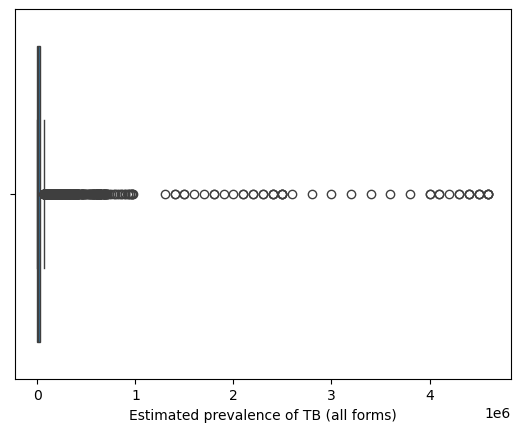

In [23]:
sns.boxplot(x=dataset_df['Estimated prevalence of TB (all forms)'])

(array([5.064e+03, 1.700e+01, 1.600e+01, 5.000e+00, 1.800e+01]),
 array([      0.,  920000., 1840000., 2760000., 3680000., 4600000.]),
 <BarContainer object of 5 artists>)

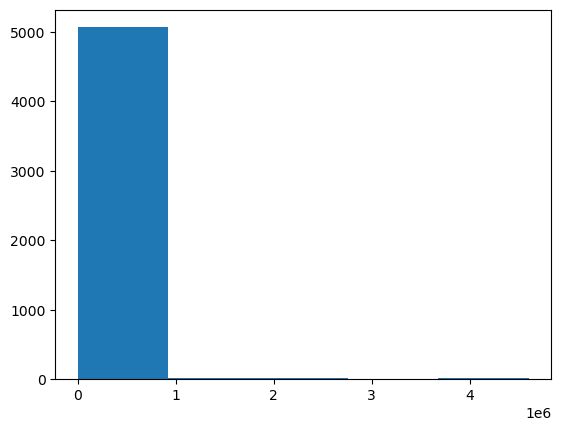

In [24]:
plt.hist(dataset_df['Estimated prevalence of TB (all forms)'], bins=5)

In [25]:
def exclude_outliers_zscore(data:object, column:str) -> 'str':
    z_score = np.abs((data[column] - data[column].mean() / data[column].std()))
    df_excl_outliers = data[(z_score>=2)]
    return df_excl_outliers
print(exclude_outliers_zscore(dataset_df, 'Estimated prevalence of TB (all forms)'))
df_excl_outliers = exclude_outliers_zscore(dataset_df, 'Estimated prevalence of TB (all forms)')
df_excl_outliers

     Country or territory name ISO 3-character country/territory code  \
0                  Afghanistan                                    AFG   
1                  Afghanistan                                    AFG   
2                  Afghanistan                                    AFG   
3                  Afghanistan                                    AFG   
4                  Afghanistan                                    AFG   
...                        ...                                    ...   
5115                  Zimbabwe                                    ZWE   
5116                  Zimbabwe                                    ZWE   
5117                  Zimbabwe                                    ZWE   
5118                  Zimbabwe                                    ZWE   
5119                  Zimbabwe                                    ZWE   

      ISO numeric country/territory code Region  Year  \
0                                      4    EMR  1990   
1        

,Country or territory name,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",Estimated prevalence of TB (all forms),...,Method to derive mortality estimates,Estimated incidence (all forms) per 100 000 population,"Estimated incidence (all forms) per 100 000 population, low bound","Estimated incidence (all forms) per 100 000 population, high bound",Estimated number of incident cases (all forms),"Estimated number of incident cases (all forms), low bound","Estimated number of incident cases (all forms), high bound","Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,Afghanistan,AFG,4,EMR,1990,11731193,306.0,156.0,506.0,36000.0,...,Indirect,189.0,157.0,238.0,22000.0,18000.0,28000.0,20.0,15.0,24.0
1,Afghanistan,AFG,4,EMR,1991,12612043,343.0,178.0,562.0,43000.0,...,Indirect,191.0,167.0,227.0,24000.0,21000.0,29000.0,96.0,80.0,110.0
2,Afghanistan,AFG,4,EMR,1992,13811876,371.0,189.0,614.0,51000.0,...,Indirect,191.0,171.0,217.0,26000.0,24000.0,30000.0,NaN,NaN,NaN
3,Afghanistan,AFG,4,EMR,1993,15175325,392.0,194.0,657.0,59000.0,...,Indirect,189.0,171.0,209.0,29000.0,26000.0,32000.0,NaN,NaN,NaN
4,Afghanistan,AFG,4,EMR,1994,16485018,410.0,198.0,697.0,68000.0,...,Indirect,188.0,169.0,208.0,31000.0,28000.0,34000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZWE,716,AFR,2009,12888918,449.0,258.0,692.0,58000.0,...,Indirect,673.0,620.0,740.0,87000.0,80000.0,95000.0,50.0,45.0,54.0
5116,Zimbabwe,ZWE,716,AFR,2010,13076978,415.0,239.0,639.0,54000.0,...,Indirect,635.0,576.0,708.0,83000.0,75000.0,93000.0,53.0,48.0,59.0
5117,Zimbabwe,ZWE,716,AFR,2011,13358738,417.0,241.0,639.0,56000.0,...,Indirect,602.0,543.0,674.0,80000.0,72000.0,90000.0,48.0,43.0,53.0
5118,Zimbabwe,ZWE,716,AFR,2012,13724317,425.0,245.0,654.0,58000.0,...,Indirect,575.0,504.0,656.0,79000.0,69000.0,90000.0,45.0,40.0,52.0


(array([4900.,   15.,   16.,    5.,   18.]),
 array([2.30000000e+00, 9.20001840e+05, 1.84000138e+06, 2.76000092e+06,
        3.68000046e+06, 4.60000000e+06]),
 <BarContainer object of 5 artists>)

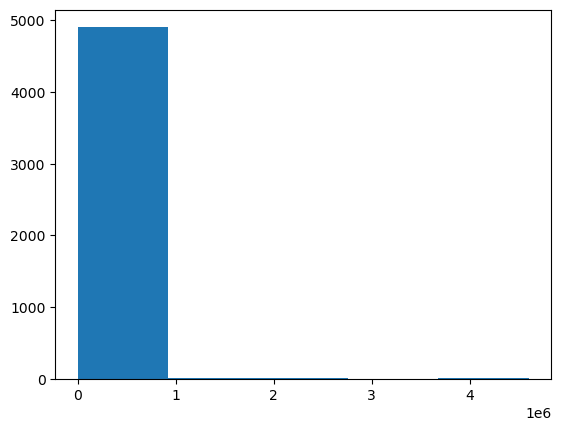

In [26]:
plt.hist(df_excl_outliers['Estimated prevalence of TB (all forms)'], bins=5)

<Axes: xlabel='Estimated prevalence of TB (all forms)'>

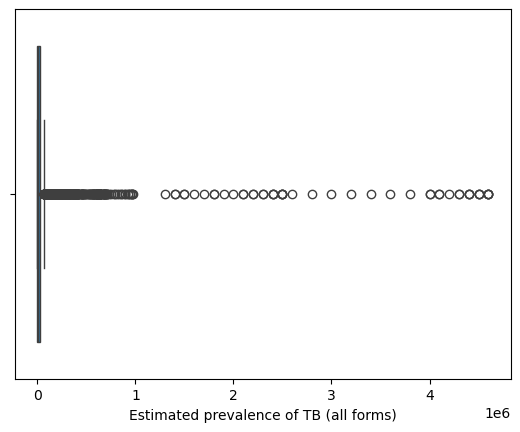

In [27]:
sns.boxplot(x=df_excl_outliers['Estimated prevalence of TB (all forms)'])

In [28]:
df_excl_outliers.describe(include='all')

,Country or territory name,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",Estimated prevalence of TB (all forms),...,Method to derive mortality estimates,Estimated incidence (all forms) per 100 000 population,"Estimated incidence (all forms) per 100 000 population, low bound","Estimated incidence (all forms) per 100 000 population, high bound",Estimated number of incident cases (all forms),"Estimated number of incident cases (all forms), low bound","Estimated number of incident cases (all forms), high bound","Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
count,4954,4954,4954.000000,4954,4954.000000,4.954000e+03,4954.000000,4954.000000,4954.000000,4.954000e+03,...,4954,4954.000000,4950.000000,4950.000000,4.954000e+03,4.950000e+03,4.950000e+03,4626.000000,4626.000000,4626.000000
unique,218,218,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AFG,NaN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,...,VR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,24,NaN,1240,NaN,NaN,NaN,NaN,NaN,NaN,...,2129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,432.061365,NaN,2001.512111,3.013292e+07,200.527614,104.680426,329.737687,6.877303e+04,...,NaN,139.055733,123.382279,156.643818,4.360200e+04,3.961880e+04,4.797975e+04,68.017203,61.797319,75.607508
std,NaN,NaN,255.471742,NaN,6.925722,1.202176e+08,261.080015,146.402012,424.318168,3.301170e+05,...,NaN,191.652008,170.786650,215.707288,1.895082e+05,1.775354e+05,2.030399e+05,25.478608,23.636309,29.275075
min,NaN,NaN,4.000000,NaN,1990.000000,1.426000e+03,1.200000,0.360000,2.400000,2.300000e+00,...,NaN,0.000000,0.810000,1.500000,0.000000e+00,1.000000e+00,1.300000e+00,0.000000,0.000000,0.000000
25%,NaN,NaN,212.000000,NaN,1995.000000,8.206685e+05,26.000000,11.000000,47.000000,4.600000e+02,...,NaN,20.000000,18.000000,22.000000,3.400000e+02,3.000000e+02,3.800000e+02,52.000000,46.000000,58.000000
50%,NaN,NaN,428.000000,NaN,2002.000000,5.416784e+06,94.000000,44.000000,156.000000,5.300000e+03,...,NaN,65.000000,59.000000,71.000000,3.800000e+03,3.400000e+03,4.350000e+03,75.000000,68.000000,82.000000
75%,NaN,NaN,646.000000,NaN,2008.000000,1.855006e+07,285.000000,144.000000,454.000000,2.800000e+04,...,NaN,189.000000,168.000000,207.000000,1.900000e+04,1.700000e+04,2.100000e+04,87.000000,77.000000,95.000000


In [29]:
df_excl_outliers.columns

Index(['Country or territory name', 'ISO 3-character country/territory code',
       'ISO numeric country/territory code', 'Region', 'Year',
       'Estimated total population number',
       'Estimated prevalence of TB (all forms) per 100 000 population',
       'Estimated prevalence of TB (all forms) per 100 000 population, low bound',
       'Estimated prevalence of TB (all forms) per 100 000 population, high bound',
       'Estimated prevalence of TB (all forms)',
       'Estimated prevalence of TB (all forms), low bound',
       'Estimated prevalence of TB (all forms), high bound',
       'Method to derive prevalence estimates',
       'Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, low bound',
       'Estimated mortality of TB cases (all forms, excluding HIV), per 100 000 population, high bound',
       'Estimated number of deaths from TB (all forms, ex

In [30]:
df_excl_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4954 entries, 0 to 5119
Data columns (total 31 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Country or territory name                                                                       4954 non-null   object 
 1   ISO 3-character country/territory code                                                          4954 non-null   object 
 2   ISO numeric country/territory code                                                              4954 non-null   int64  
 3   Region                                                                                          4954 non-null   object 
 4   Year                                                                                            4954 non-null   int64  
 5   Estimated total po

In [31]:
df_numbers = df_excl_outliers.drop(columns=['Country or territory name', 'ISO 3-character country/territory code',
                                            'Region', 'Method to derive prevalence estimates', 'Method to derive mortality estimates'], axis=1)
df_numbers.shape

(4954, 26)

In [32]:
df_numbers

,ISO numeric country/territory code,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",Estimated prevalence of TB (all forms),"Estimated prevalence of TB (all forms), low bound","Estimated prevalence of TB (all forms), high bound","Estimated mortality of TB cases (all forms, excluding HIV) per 100 000 population",...,Estimated number of deaths from TB in people who are HIV-positive,Estimated incidence (all forms) per 100 000 population,"Estimated incidence (all forms) per 100 000 population, low bound","Estimated incidence (all forms) per 100 000 population, high bound",Estimated number of incident cases (all forms),"Estimated number of incident cases (all forms), low bound","Estimated number of incident cases (all forms), high bound","Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,4,1990,11731193,306.0,156.0,506.0,36000.0,18000.0,59000.0,37.0,...,5.0,189.0,157.0,238.0,22000.0,18000.0,28000.0,20.0,15.0,24.0
1,4,1991,12612043,343.0,178.0,562.0,43000.0,22000.0,71000.0,46.0,...,8.0,191.0,167.0,227.0,24000.0,21000.0,29000.0,96.0,80.0,110.0
2,4,1992,13811876,371.0,189.0,614.0,51000.0,26000.0,85000.0,54.0,...,11.0,191.0,171.0,217.0,26000.0,24000.0,30000.0,NaN,NaN,NaN
3,4,1993,15175325,392.0,194.0,657.0,59000.0,30000.0,100000.0,60.0,...,17.0,189.0,171.0,209.0,29000.0,26000.0,32000.0,NaN,NaN,NaN
4,4,1994,16485018,410.0,198.0,697.0,68000.0,33000.0,110000.0,65.0,...,22.0,188.0,169.0,208.0,31000.0,28000.0,34000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,716,2009,12888918,449.0,258.0,692.0,58000.0,33000.0,89000.0,39.0,...,27000.0,673.0,620.0,740.0,87000.0,80000.0,95000.0,50.0,45.0,54.0
5116,716,2010,13076978,415.0,239.0,639.0,54000.0,31000.0,84000.0,36.0,...,26000.0,635.0,576.0,708.0,83000.0,75000.0,93000.0,53.0,48.0,59.0
5117,716,2011,13358738,417.0,241.0,639.0,56000.0,32000.0,85000.0,38.0,...,24000.0,602.0,543.0,674.0,80000.0,72000.0,90000.0,48.0,43.0,53.0
5118,716,2012,13724317,425.0,245.0,654.0,58000.0,34000.0,90000.0,41.0,...,22000.0,575.0,504.0,656.0,79000.0,69000.0,90000.0,45.0,40.0,52.0


In [33]:
grouped_data = df_excl_outliers.groupby('Estimated prevalence of TB (all forms)')['Year'].apply(list)
grouped_data

Estimated prevalence of TB (all forms)
2.3                [2010, 2000, 2002]
2.4                      [2010, 2006]
2.6                      [1991, 2001]
2.7          [1990, 1996, 2011, 2010]
2.8                [2009, 1993, 2007]
                       ...           
4200000.0                      [1992]
4300000.0                [1993, 2004]
4400000.0          [1994, 1995, 2003]
4500000.0          [1996, 2001, 2002]
4600000.0    [1997, 1998, 1999, 2000]
Name: Year, Length: 530, dtype: object

In [34]:
import scipy.stats as stats
f_statistic, p_value=stats.f_oneway(*grouped_data)

print('this is our f-stat: ', f_statistic)
print('this is our p_value: ', p_value)

this is our f-stat:  1.3532625199373196
this is our p_value:  6.048915878037695e-07


getting ready to plot


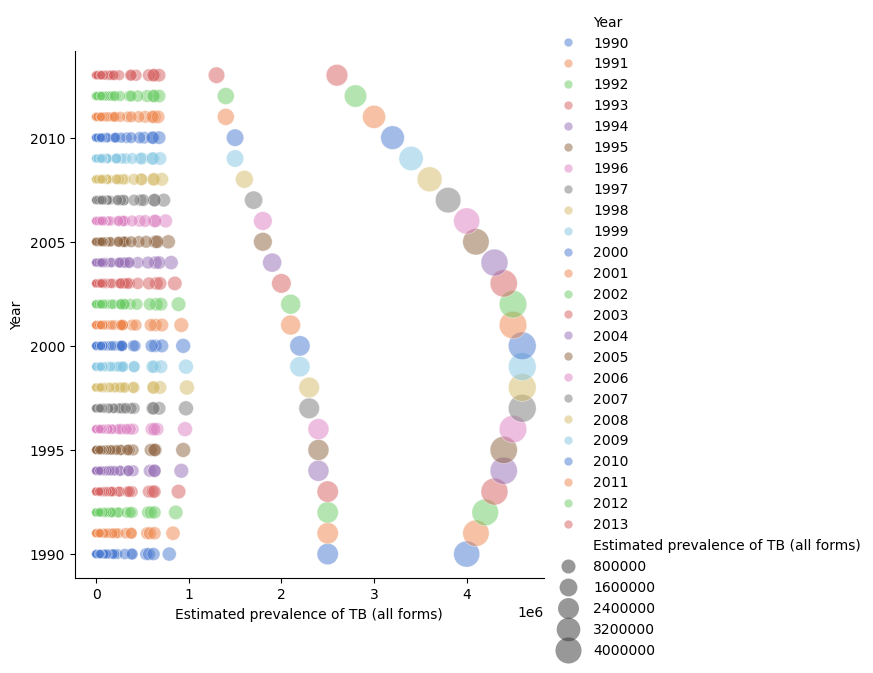

In [35]:
sns.relplot(x="Estimated prevalence of TB (all forms)", y="Year", hue="Year", size="Estimated prevalence of TB (all forms)", 
           sizes=(40, 400), alpha=.5, palette='muted', height=6, data=df_excl_outliers)
print('getting ready to plot')

<Axes: xlabel='Estimated prevalence of TB (all forms)', ylabel='Year'>

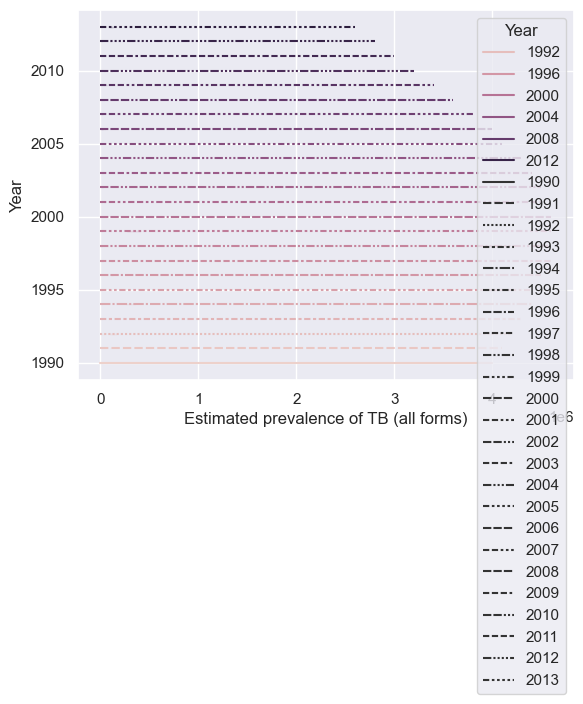

In [36]:
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="Estimated prevalence of TB (all forms)", y="Year",
             hue="Year", style="Year",
             data=df_excl_outliers)